# 03 Similarities
__Math 3280 - Data Mining__ : Snow College : Dr. Michael E. Olson

-----

## 3.1 Jaccard Similarity
The Jaccard Similarity compares two pieces of information to see how similar they are. Each row is a set
The calculation is,
$$SIM(S,T) = \frac{|S\cap T|}{|S\cup T|}$$

A simple example:
$$A = \{1, 3, 5\} \qquad B = \{3, 4, 5, 6\}$$
Venn diagram (Square brackets encompass elements of A, round brackets encompass elements of B):
$$\Big[1 \Big( 3, 5 \Big] 4, 6\Big)$$

There are 5 elements total, so $|A\cup B| = 5$. Only 2 elements are in both, so $|A\cup B| = 2$.
$$SIM(A,B) = \frac{|A\cap B|}{|A\cup B|} = \frac{2}{5}$$

There are two similarity calculations:
* Jaccard Similarity
  * Union is all elements, not repeated - just looking at possible values
$$|A\cup B| = \big|\{1, 3, 4, 5, 6\}\big| = 5 \qquad SIM(A,B) = \frac{2}{5}$$
* Jaccard Bag Similarity
  * Union is all elements in both sets combined, as if they were two bags mixed together
$$|A\cup B| = \big|\{1, 3, 5, 3, 4, 5, 6\}\big| = 7 \qquad SIM(A,B) = \frac{2}{7}$$


Another example:
|     |  S  |  T  |
| --- | --- | --- |
| x_0 |  1  |  0  |
| x_1 |  0  |  1  |
| x_2 |  0  |  0  |
| x_3 |  1  |  1  |
| x_4 |  0  |  1  |
| x_5 |  1  |  0  |
| x_6 |  1  |  1  | 
| x_7 |  0  |  0  |
| x_8 |  1  |  1  |  
| x_9 |  0  |  1  |

We can consider, instead of a list of all datapoints, just count the number of all possibilities.
|     |  S  |  T  |  #  |
| --- | --- | --- | --- |
| r_0 |  0  |  0  |  2  |
| r_1 |  0  |  1  |  3  |
| r_2 |  1  |  0  |  2  |
| r_3 |  1  |  1  |  3  |

Either way, the Jaccard Similarity is,
$$|S\cap T| = 3 \qquad |S\cup T| = 8 \qquad SIM(S,T) = \frac{|S\cap T|}{|S\cup T|} = \frac{3}{8}$$

This can be used in a variety of ways:
* Similarity of Documents
* Plagiarism
* Mirror Pages
* Articles from the Same Source
* __Collaborative Filtering__
  * On-line Purchases
  * Movie Ratings

-----
## 3.2 Shingling of Documents
If we want to compare two documents, we could compare every character and sequence of characters. However, this is a very costly process in computational resources and in time. A more efficient method is to look instead at sets of short strings that appear in documents.

A __shingle__ is a string of characters within a phrase. A __$k$-shingle__ is a shingle of size $k$.

Take the phrase: "Data Mining". The k-shingles are:
* $k=2\qquad\{Da,at,ta,a~,~M,Mi,in,ni,in,ng\}$
* $k=3\qquad\{Dat,ata,ta~,a~M,~Mi,Min,ini,nin,ing\}$
* $k=4\qquad\{Data,ata~,ta~M,a~Mi,~Min,Mini,inin,ning\}$
* $k=5\qquad\{Data~,ata~M,ta~Mi,a~Min,~Mini,Minin,ining\}$
* $k=6\qquad\{Data~M,ata~Mi,ta~Min,a~Mini,~Minin,Mining\}$
* $k=7\qquad\{Data~Mi,ata~Min,ta~Mini,a~Minin,~Mining\}$
* $k=8\qquad\{Data~Min,ata~Mini,ta~Minin,a~Mining\}$
* $k=9\qquad\{Data~Mini,ata~Minin,ta~Mining\}$
* $k=10\qquad\{Data~Minin,ata~Mining\}$
* $k=11\qquad\{Data~Mining\}$

Once a word/phrase/document is broken into $k$-shingles, then we just compare the number of similar shingles.

*Example*: What is the $k=2$ shingle Jaccard Similarity between the names "John" and "Joan"?
* John: $\{Jo, oh, hn\}$
* Joan: $\{Jo, oa, an\}$
$$[oh, hn, (Jo], oa, an)$$
$$SIM(John,Joan) = \frac{|John \cap Joan|}{|John \cup Joan|} = \frac{1}{5}$$

What size should we pick for $k$?
* If it's too small, then we risk having sequences that frequently appear in many documents, giving a high Jaccard similarity even though they are completely different
  * $k$ should be picked large enough that the probability of any given shingle appearing in any given document is low
* If it's too large, then we end up with very sparse data - too many possibilities that have almost no chance of occuring - resulting in large nonessential computations

A couple rules of thumb we can follow:
* Including a space for any whitespace, there are 27 possible characters, so there are $27^k$ possible shingles
* Consider an email
  * Using a $k=2$ shingle, there are $27^2 = 729$ different possible shingles. This is about the size of a typical email, so the probability for each of these shingles occuring is relatively high.
  * Using a $k=5$ shingle, there are $27^5 = 14,348,907$ different possible shingles. This is far larger than the size of a single email, so the probability for each of these shingle occuring is relatively low.
* Some characters are more likely to occur than others (*a* is more common than *z*)
  * Good rule of thumb is to approximate with only 20 possible characters, so the number of $k$-shingles is __$20^k$__

For an email, $k=5$ is pretty good. For a large document (such as a research paper), we may want to increase that to $k=9$.

To simplify calculations, instead of keeping a list of possible shingles and trying to match, we can use *hash functions*.
* A $k=9$ shingle takes up 9 bytes (one for each character
* Using a hash function between $0$ and $2^{32} - 1$, each shingle can be represented using only 4 bytes

### Shingles built from Words
Although this does simplify the process of tracking the shingles, it is still too sparse. That is, there are still too many unused shingles. Instead, we can create *shingles built from words.* A common method is to use stop-word-based shingles (the, a, an, for, that, have, ...)

GEICO advertisement
* 15 minutes could save you 15% on car insurance
* Has 2 stop-word shingles:
  * could save you
  * on car insurance
  
GEICO statement
* If you own a car, you need auto insurance. A car insurance policy helps provide financial protection for you, and possibly others if you're involved in an accident. All it takes is a few minutes to get a personalized car insurance quote with the best rates, discounts, and options available to you.
* Has 17 stop-word shingles:
  * if you own
  * a car you
  * a car insurance
  * for you and
  * and possibly others
  * if you're involved
  * in an accident
  * an accident all
  * it takes is
  * is a few
  * a few minutes
  * to get a
  * a personalized car
  * with the best
  * the best rates
  * and options available
  * to you
  

-----
## 3.3 Similarity-Preserving Summaries of Sets
* Shingling takes a lot of space - nearly 4x as much as the document itself
* Large numbers of documents could make it impossible to store all the shingle-sets in memory
* Instead of sets, we're going to replace them with "__signatures__"
  * This won't give exact Jaccard similarities, but it gives a good estimate
  * The larger the signatures, the more accurate the estimates become

We'll look at these signatures by,
1. Representing the sets as a matrix
2. Use Minhashing to get a signature from each set

Let's define a few sets:
$$S_1 = \{a,c,d\}\qquad S_2 = \{b,c,e\} \qquad S_3 = \{a,e\} \qquad S_4 = \{c,d\}$$

Now, we'll represent each set as a column in a matrix $A$, and the elements will be set as rows in that matrix. We'll set $A_{ij}=1$ if element $i$ is in set $S_j$. 

| Element |  S1   |  S2   |  S3   |  S4   |
| :-----: | :---: | :---: | :---: | :---: |
|    a    |   1   |   0   |   1   |   0   |
|    b    |   0   |   1   |   0   |   0   |
|    c    |   1   |   1   |   0   |   1   |
|    d    |   1   |   0   |   0   |   1   |
|    e    |   0   |   1   |   1   |   0   |

An example of this might be that each row is a product from a store, and each column a customer, then each cell would represent whether the customer bought (1) that product or not (0).

This isn't how data is stored, but it's a first step in helping us understand the process. A matrix like this would be sparse.
* Instead of storing the data, we store the location of any 1
* Information would be stored instead as a list of tuples containing the element and the set
  * Using the example of purchases, a tuple might contain (item, purchaser, [details])

### Minhashing
With a minhash, we first permute the rows so that they are in a different order
* Actually permuting the rows would take too much time and too many resources
* Instead, randomize the indices

| Element | Index | Random Index |  S1   |  S2   |  S3   |  S4   |
| :-----: | :---: | :----------: | :---: | :---: | :---: | :---: |
|    a    |   0   |       2      |   1   |   0   |   1   |   0   |
|    b    |   1   |       1      |   0   |   1   |   0   |   0   |
|    c    |   2   |       3      |   1   |   1   |   0   |   1   |
|    d    |   3   |       4      |   1   |   0   |   0   |   1   |
|    e    |   4   |       0      |   0   |   1   |   1   |   0   |

The hash function for each set will then be the first row that has a 1 value. Here are two ways to think about it:
1. Following the random index, then find the first random index that has a value $1$
    * $S_1[0]=0, S_1[1]=0, S_1[2]=1$
    * random index 2 corresponds with an `a`, so $h(S_1)=a$
    * $S_2[0]=1$
    * random index 0 corresponds with an `e`, so $h(S_2)=e$
    * $S_3[0]=1$
    * random index 0 corresponds with an `e`, so $h(S_3)=e$
    * $S_4[0]=0, S_4[1]=0, S_4[2]=0, S_4[3]=1$
    * random index 3 corresponds with a `c`, so $h(S_4)=c$
2. If we do actually reorder the rows, then take the first row with a value $1$
    * Following the random index column, the order is \{e, b, a, c, d\}
    
| Element |  S1   |  S2   |  S3   |  S4   |
| :-----: | :---: | :---: | :---: | :---: |
|    e    |   0   |   1   |   1   |   0   |
|    b    |   0   |   1   |   0   |   0   |
|    a    |   1   |   0   |   1   |   0   |
|    c    |   1   |   1   |   0   |   1   |
|    d    |   1   |   0   |   0   |   1   |
| ------- | ----- | ----- | ----- | ----- |
| __1st element__ | __a__ | __e__ | __e__ | __c__ |

Of course, this second option isn't very practical for large datasets.

Below is some python code to demonstrate how this is done:

In [1]:
S1 = ['a','c','d']
S2 = ['b','c','e']

elements = ['a','b','c','d','e']

# Hot encoding
S1_hot = [1 if x in S1 else 0 for x in elements]
S2_hot = [1 if x in S2 else 0 for x in elements]

print("S1 --> ",S1_hot)
print("S2 --> ",S2_hot)

S1 -->  [1, 0, 1, 1, 0]
S2 -->  [0, 1, 1, 0, 1]


In [2]:
from random import shuffle

rand_elements = ['a','b','c','d','e']
shuffle(rand_elements)
print(rand_elements)

['e', 'd', 'c', 'a', 'b']


In [3]:
for i in range(5):
    print(f"{elements[i]} -> {rand_elements.index(elements[i])}")

a -> 3
b -> 4
c -> 2
d -> 1
e -> 0


In [4]:
h_S1 = 0
h_S2 = 0

for i in range(5):
    idx = elements.index(rand_elements[i])
    if (h_S1 == 0) & (S1_hot[idx] == 1):
        h_S1 = rand_elements[i]
    if (h_S2 == 0) & (S2_hot[idx] == 1):
        h_S2 = rand_elements[i]
    print(f"{rand_elements[i]}  ->  {S1_hot[idx]} for S1     {S2_hot[idx]} for S2")

print() # Blank line to separate results
print(f"h(S1) = {h_S1}    h(S2) = {h_S2}")

e  ->  0 for S1     1 for S2
d  ->  1 for S1     0 for S2
c  ->  1 for S1     1 for S2
a  ->  1 for S1     0 for S2
b  ->  0 for S1     1 for S2

h(S1) = d    h(S2) = e


$$\require{cancel}$$ 
The interesting thing about Minhashing is that the probability that any two sets has the same hash function equals the Jaccard similarity between those sets.

The math of this relationship:
* When looking at any row in any two sets, there are three possibilities:
    1. Both values are a 1 (We'll call this a type $X$ row)
    2. One value is 1 and the other is 0 (We'll call this a type $Y$ row)
    3. Both values are a 0 (We'll call this a type $Z$ row)
* Let $x$ be the number of rows of type $X$, or the number of rows where $S_1$ and $S_2$ are both 1
  * $|S_1 \cap S_2| = x$
* Let $y$ be the number of rows of type $Y$, or the number of rows where either $S_1$ or $S_2$ is 1, but not both (that is, everything *except* the intersection)
  * $|S_1 \cancel{\cap} S_2| = y$
  * $|S_1 \cup S_2| = |S_1 \cap S_2| + |S_1 \cancel{\cap} S_2| = x+y$
* The Jaccard similarity would be:
$$SIM(S_1,S_2) = \frac{|S_1 \cap S_2|}{|S_1 \cup S_2|} = \frac{x}{x+y}$$


$$P\left[h(S_1) = h(S_2)\right] = \frac{x}{x+y} = SIM(S_1,S_2)$$

Now, we use this minhash technique to create a unique signature for the set.
* Run the minhash process a large number of times (100+ times)
* The sequence of hashes becomes a signature for that set

In [12]:
import numpy as np
import pandas as pd

S1 = ['a','c','d']
S2 = ['b','c','e']
S3 = ['a', 'e']
S4 = ['c', 'd']
S5 = ['b','c','e']
S6 = ['b','c','d']

elements = ['a','b','c','d','e']

# Hot encoding
S1_hot = [1 if x in S1 else 0 for x in elements]
S2_hot = [1 if x in S2 else 0 for x in elements]
S3_hot = [1 if x in S3 else 0 for x in elements]
S4_hot = [1 if x in S4 else 0 for x in elements]
S5_hot = [1 if x in S5 else 0 for x in elements]
S6_hot = [1 if x in S6 else 0 for x in elements]

n = 100
h1 = ['_' for i in range(n)]
h2 = ['_' for i in range(n)]
h3 = ['_' for i in range(n)]
h4 = ['_' for i in range(n)]
h5 = ['_' for i in range(n)]
h6 = ['_' for i in range(n)]

for k in range(n):
    shuffle(rand_elements)
    for i in range(5):
        idx = elements.index(rand_elements[i])
        if (h1[k] == '_') & (S1_hot[idx] == 1):
            h1[k] = rand_elements[i]
        if (h2[k] == '_') & (S2_hot[idx] == 1):
            h2[k] = rand_elements[i]
        if (h3[k] == '_') & (S3_hot[idx] == 1):
            h3[k] = rand_elements[i]
        if (h4[k] == '_') & (S4_hot[idx] == 1):
            h4[k] = rand_elements[i]
        if (h5[k] == '_') & (S5_hot[idx] == 1):
            h5[k] = rand_elements[i]
        if (h6[k] == '_') & (S6_hot[idx] == 1):
            h6[k] = rand_elements[i]
        if (h1[k] != '_') & (h2[k] != '_') & (h3[k] != '_') & (h4[k] != '_') & (h5[k] != '_') & (h6[k] != '_'):
            break

# Displaying signatures as a Matrix
signature_matrix = pd.DataFrame({'S1':h1, 'S2':h2, 'S3':h3, 'S4':h4, 'S5':h5, 'S6':h6})
signature_matrix

,S1,S2,S3,S4,S5,S6
0,c,e,e,c,e,c
1,d,b,a,d,b,b
2,c,b,e,c,b,b
3,c,c,e,c,c,c
4,c,c,e,c,c,c
...,...,...,...,...,...,...
95,a,c,a,d,c,d
96,d,b,e,d,b,d
97,c,e,e,c,e,c
98,d,e,e,d,e,d


* The Jaccard similarity between $S_i$ and $S_j$ is estimated by the probability that the two columns have the same value in a given row of the signature matrix
* The expected number of rows in which two columns agree equals the Jaccard similarity of their corresponding sets
* The more rows in the signature matrix, the smaller the expected error in the estimate of the Jaccard Similarity will be

-----
## 3.4 Locality-Sensitive Hashing for Documents


Even with the minhashed signature matrix, the calculations can still take too long. 
* If you have 1,000,000 columns and you are finding the similarity of 2 columns at a time, then there will be $\binom{1,000,000}{2}$ calculations. That's about half a trillion pairs.

To simplify, we are going to look at the first few rows and throw out any of the columns that don't show any similarity.
* Separate the data into $b$ groups (or bands) of $r$ rows
* If the signatures in two columns are equal, then they have the potential to be similar. If they are not the same, then they are likely not similar.
  * Columns with similar signatures are known as a __candidate pair__.
  * There is the possibility of a *false positive* when the signatures of two columns happen to be similar in the bands, but not in the entire column
  * There is also the possibility of a *false negative* when the signatures of two columns are not similar in the bands, but the columns really are similar
  * Statistically, the hope is that these *false positives* and *false negatives* are few since "the more similar two columns are, the more likely it is that they will be identical in some band."
  * A possible way to improve is to look at the first $k$ bands and finding which candidate pairs have the most number of bands with similar signatures
  
In the following code, we take the signature matrix we made earlier and break it up into $b=25$ groups of $r=4$ rows each.
* Notice how S2 and S5 have the same signtures in every group. This indicates a HIGH chance of being similar, so it is a *candidate pair*. 
* S2 and S6 are close, but not quite there. However, in the third group, S2 and S6 have the same signatures. They can eventually be considered to be a *candidate pair* if no other similar columns are found, but since they are not similar in the first group, they are less likely to be similar.

In [13]:
r = 4
b = int(len(signature_matrix)/r) # 25

for i in range(b):
    print(signature_matrix[r*i:r*(i+1)])

  S1 S2 S3 S4 S5 S6
0  c  e  e  c  e  c
1  d  b  a  d  b  b
2  c  b  e  c  b  b
3  c  c  e  c  c  c
  S1 S2 S3 S4 S5 S6
4  c  c  e  c  c  c
5  a  e  a  c  e  c
6  d  b  a  d  b  b
7  c  c  e  c  c  c
   S1 S2 S3 S4 S5 S6
8   a  b  a  d  b  b
9   a  c  a  c  c  c
10  d  b  a  d  b  b
11  a  b  a  c  b  b
   S1 S2 S3 S4 S5 S6
12  c  c  e  c  c  c
13  a  b  e  d  b  b
14  c  c  a  c  c  c
15  a  e  a  d  e  d
   S1 S2 S3 S4 S5 S6
16  c  c  a  c  c  c
17  a  e  a  d  e  d
18  a  b  e  c  b  b
19  c  c  a  c  c  c
   S1 S2 S3 S4 S5 S6
20  c  e  e  c  e  c
21  c  c  e  c  c  c
22  c  c  e  c  c  c
23  d  e  e  d  e  d
   S1 S2 S3 S4 S5 S6
24  d  e  e  d  e  b
25  d  e  e  d  e  d
26  d  e  e  d  e  d
27  a  b  a  c  b  b
   S1 S2 S3 S4 S5 S6
28  a  e  e  d  e  b
29  c  c  a  c  c  c
30  a  b  a  c  b  b
31  c  c  a  c  c  c
   S1 S2 S3 S4 S5 S6
32  d  e  e  d  e  d
33  c  c  a  c  c  c
34  d  b  a  d  b  b
35  d  e  e  d  e  d
   S1 S2 S3 S4 S5 S6
36  d  c  a  d  c  d
37  d  c  a  d  c  d
38

How good is LSH? Consider probabilities:
* The Jaccard Similarity is equal to the probability that the two values in any particular row are the same ($s = SIM(S_i, S_j)$)
* Divide the signature matrix into $b$ bands of $r$ rows each

The following are the calculated probabilities:
* The probability that all signatures in a given band agree is $s^r$
* The probability that at least one row in a given band disagrees is $1 - s^r$
* The probability that at least one row in all bands disagrees is $(1-s^r)^b$
* The probability that all signatures agree in at least one band is $1 - (1-s^r)^b$

This last probability is what we want - the probability that the columns in any one band will agree. This function actually looks like an S-curve. If two columns have a low Jaccard similarity, they have little chance that the signatures in any band will agree, so little chance of becoming a candidate pair. On the other hand, if two columns have a high Jaccard similarity, there is a higher chance that the signatures in any band will agree.

Above, we broke our signature matrix into $b=25$ bands of $r=4$ each. Following is a calculation and graph of the function $1 - (1-s^r)^b$ function.

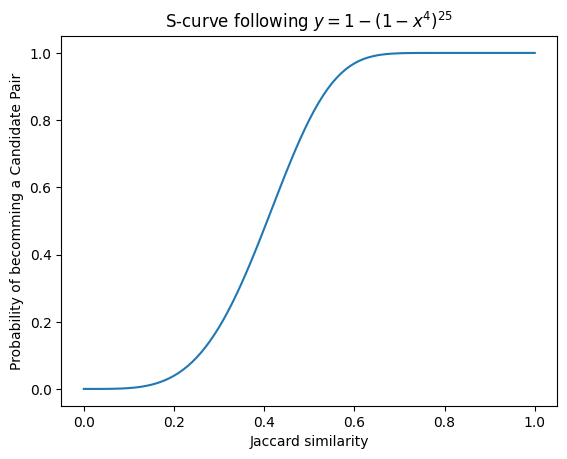

s=0.0  -->  1-(1-s^r)^b = 0.0
s=0.1  -->  1-(1-s^r)^b = 0.0024970022987352847
s=0.2  -->  1-(1-s^r)^b = 0.03924133845111111
s=0.3  -->  1-(1-s^r)^b = 0.18398666378816453
s=0.4  -->  1-(1-s^r)^b = 0.4770840580390957
s=0.5  -->  1-(1-s^r)^b = 0.8008034052167364
s=0.6  -->  1-(1-s^r)^b = 0.9688848385454178
s=0.7  -->  1-(1-s^r)^b = 0.9989554935822509
s=0.8  -->  1-(1-s^r)^b = 0.9999981004150488
s=0.9  -->  1-(1-s^r)^b = 0.9999999999974248
s=1.0  -->  1-(1-s^r)^b = 1.0


In [28]:
import numpy as np
import matplotlib.pyplot as plt

r = 4
b = 25

x = np.linspace(0,1,101)
y = 1 - (1 - x**r)**b

plt.plot(x,y)
plt.title('S-curve following $y = 1 - (1 - x^4)^{25}$')
plt.xlabel('Jaccard similarity')
plt.ylabel('Probability of becomming a Candidate Pair')
plt.show()

for i in range(11):
    print(f"s={i/10}  -->  1-(1-s^r)^b = {y[i*10]}") # Print probabilities for Jaccard similarities 0.1, 0.2, 0.3, ...

Here is a couple things to look at to analyze this graph:

1. Looking at this data, we see that a pair of columns has at least a 50% chance of becomming a candidate pair when the Jaccard similarity is a little over 0.4 or higher.
    * The probability jumps from 0.18 to 0.80 (a difference of over 0.6) when $s$ increases from 0.3 to 0.5. That means that the slope where the probability is 50% ($s$ is just over 0.4) is roughly $0.6/0.2 = 3$.
    * This shows a pretty clear distinction between the two sides of the graph
    * If two columns are not similar, then there is little chance that bands will agree, so little chance it will become a candidate pair
    * If two columns are actually similar, then there is a high chance that bands will agree, so high chance it will become a candidate pair

2. At $s=0.7$, we calculate the chance of one band not agreeing to be $1-0.7^4 = 0.7599$ (That is, a 75.99% chance of at least one disagreement in a band, or only a 24.01% chance that all agree). However, if we look at all 25 rows, then there is a $(1-0.7^4)^{25} = 0.0010$ (or $0.1%$) chance that all bands disagree (that is, of the 25 bands, the one you look at has a 99.9% chance that the signatures agree).

So, LSH actually does significantly increase the odds of finding columns with high Jaccard similarity.

-----
## Homework
1. Exercise 3.1.1
2. Exercise 3.1.2
3. Exercise 3.2.1
4. Exercise 3.2.2
5. Exercise 3.3.1
6. Exercise 3.3.3
7. Exercise 3.3.4
8. Exercise 3.3.8
9. Exercise 3.4.1
10. Exercise 3.4.2
11. Exercise 3.5.1
12. Exercise 3.5.2
13. Exercise 3.5.4
14. Exercise 3.5.5

## Project
* Using a dataset on food types consumed in different countries, find the food types that are most similar and the countries that consume those food types.